# Question 1 - Data Acquisition

First we should install required libraries

In [29]:
! pip install requests
! pip install bs4
! pip install pandas

In [196]:
import json                    # use json to turn data into json format
import requests as r           # use requests to make http requests to web pages
from bs4 import BeautifulSoup  # use BeautifulSoup to make docs. easy to extract data

In [198]:
url = 'https://www.bbc.com/news' # Target website
res = r.get(url)                 # send request
res.encoding = 'utf8'
html = res.text                  

In [200]:
bf = BeautifulSoup(html, 'html.parser') # Analysis html

In [202]:
divs = bf.find_all('div', attrs={'data-testid': 'card-text-wrapper'}) # Find the news component

In [194]:
data = []
count = 0 # Add Counter

for div in divs:
    title = div.find('h2').text # get news title
    content = div.find('p').text # get news content
    data.append({'title': title, 'content': content})
    count += 1  # Counter increase
    if count >= 30:  # Stop when 30 entries are reached
        break

#turn data into json format
with open('news_data.json', 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)  


# Question 2 - Data Preprocessing

In [20]:
import re # use re

## 1.Write a pattern to check if a string contains only letters (both uppercase and lowercase).
- Test cases: Hello, world, 123abc

In [233]:
pattern = r'^[a-zA-Z]+$' # ^ for the beginning, $ for the end, [a-zA-Z]+ for one or more letters
cases = ["Hello", "world", "123abc"]

for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

Hello: Valid
world: Valid
123abc: Invalid


## 2.Write a pattern to find all words that start with a vowel.- Test cases: apple, banana, orange, grape

In [265]:
pattern = r'\b[aeiouAEIOU]\w*' # \b for word boundaries, [aeiouAEIOU] for beginning with a vowel letter
cases = ["apple", "banana", "orange", "grape"]

for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

apple: Valid
banana: Invalid
orange: Valid
grape: Invalid


## 3.Write a pattern to validate an email address.- Test cases: test@example.com, invalid-email

In [267]:
pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$' # Include username, @ and domain name
cases = ["test@example.com", "invalid-email"]

for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

test@example.com: Valid
invalid-email: Invalid


## 4.Write a pattern to extract all digits from a string.
- Test cases: The price is 100 dollars and 50 cents.

In [278]:
pattern = r'\d+' # \d+ denotes one or more numbers
case = "The price is 100 dollars and 50 cents."

# Use the findall method to extract all the numbers
matches = re.findall(pattern, case)
print(matches)

['100', '50']


## 5.Write a pattern to match a URL.- Test cases:  https://www.example.com, ftp://example.com

In [303]:
pattern = r'^(https?://|ftp://)[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$' # (https?://|ftp://) for "http://" or "https://" or "ftp://"
cases = ["https://www.example.com", "ftp://example.com"]      # [a-zA-Z0-9.-]+ for one or more letters, numbers, dots or hyphens
                                                              # [a-zA-Z]{2,} for two or more letters
for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

https://www.example.com: Valid
ftp://example.com: Valid


## 6.Write a pattern to validate a US phone number format (e.g., (123) 456-7890)- Test cases: (123) 456-7890, 123-456-7890

In [33]:
pattern = r'^\(\d{3}\) \d{3}-\d{4}$' # Three figures in brackets followed by a space after the brackets
cases = ["(123) 456-7890", "123-456-7890"]

for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

(123) 456-7890: Valid
123-456-7890: Invalid


## 7.Write a pattern to find a string that starts and ends with the same character.- Test cases: radar, hello, level

In [39]:
pattern = r'^(.).*\1$' # ^ denotes the beginning, (.)denotes an arbitrary character, \1 denotes the same character as in the beginning.
cases = ["radar", "hello", "level"]

for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

radar: Valid
hello: Invalid
level: Valid


## 8.Write a pattern to validate a complex password. The password must contain at least one uppercase letter, one lowercase letter, one digit, one special character, and be at least 8 characters long.
- Test cases: Password1!, PASSWORD,1!, Pass1!

In [48]:
pattern = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[!@#$%^&*])[A-Za-z\d!@#$%^&*]{8,}$' # (?=...) is used to confirm the inclusion of the fulfilment of four conditions
cases = ["Password1!", "PASSWORD,1!", "Pass1!"]

for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

Password1!: Valid
PASSWORD,1!: Invalid
Pass1!: Invalid


## 9.Write a regex pattern to identify and extract all instances of dates in the format dd-mm-yyyy or yyyy/mm/dd from a given text. The pattern should handle both formats in a single regex.
- Test cases: I12-05-2023, 2023/06/15, and 01-01-2024.

In [118]:
pattern = r'(?:(\d{2}-\d{2}-\d{4})|(\d{4}/\d{2}/\d{2}))' # 2 2 4 connected with - or 4 2 2 numbers with /
case = "I12-05-2023, 2023/06/15, and 01-01-2024."

dates = re.findall(pattern, case)
formatted_dates = [','.join(filter(None, date)) for date in dates] # Format the output
print(formatted_dates)

['12-05-2023', '2023/06/15', '01-01-2024']


## 10.Create a regex pattern that matches a valid IPv4 address. The address must consist of four octets separated by dots, where each octet is a number between 0 and 255
- Test cases: : 192.168.0.1, 256.100.50.25, 172.16.254.1

In [134]:
pattern = r'^(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'
cases = ["192.168.0.1", "256.100.50.25", "172.16.254.1"]
# 25[0-5] for 250-255, 2[0-4][0-9] for 200-249, [01]?[0-9][0-9]? for 0-199
for c in cases:
    match = re.match(pattern, c)
    print(f"{c}: {'Valid' if match else 'Invalid'}")

192.168.0.1: Valid
256.100.50.25: Invalid
172.16.254.1: Valid


# Question 3 - Data Processing

## 1.Please convert the data in this file 1 to the line-based text with your own Python codes. You need to remove al punctuation and convert all text to lowercase.

In [144]:
import xml.etree.ElementTree as ET
import re

In [180]:
tree = ET.parse('sample-hyp.xml') # use xml.etree.ElementTree to process XML file
root = tree.getroot() # get the root node

with open('sample-hyp.txt', 'w', encoding='utf-8') as output_file: #process and output
        for elem in root.iter(): # iterate through each element in the XML
            text = elem.text # get each element's text
            if text:
                formatted_text = re.sub(r'[^\w\s]', '', text).lower() # if text exist, remove punctuation and convert to lowercase using re
                output_file.write(formatted_text + '\n')

## 2.After you obtain the line-based text file, please create a BPE vocabulary (save each BPE token line by line) with subword-nmt.

In [2]:
pip install subword-nmt

Note: you may need to restart the kernel to use updated packages.


In [2]:
subword-nmt learn-bpe -s 1000 < sample-hyp.txt > bpe.txt

SyntaxError: invalid syntax (1341390262.py, line 1)

# Question 4 - Data Visualization

## 1. Assume we have a set of employee records containing employee ID (Integer; 1-500), department (Categorical; HR, IT, Sales), sex (Binary; Male/Female), and years of experience (Integer; 0-40), we intend to analyze these attributes by visualization. Which visualization technique should be selected for different attributes?

A: We can use bar chart to show the count in different department to show the gap in headcount. Pie chart will be a nice choice to display the proportion of men and women.
And we can choose histogram to display the distribution of years of experience among employees.

## 2. Write a Python Program to randomly generate 500 employee records based on the above descriptions and visualize the generated data using your selected techniques.
## AND 3. Calculate the number of employees per department and visualize the results using a bar chart for the generated data.

In [6]:
pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


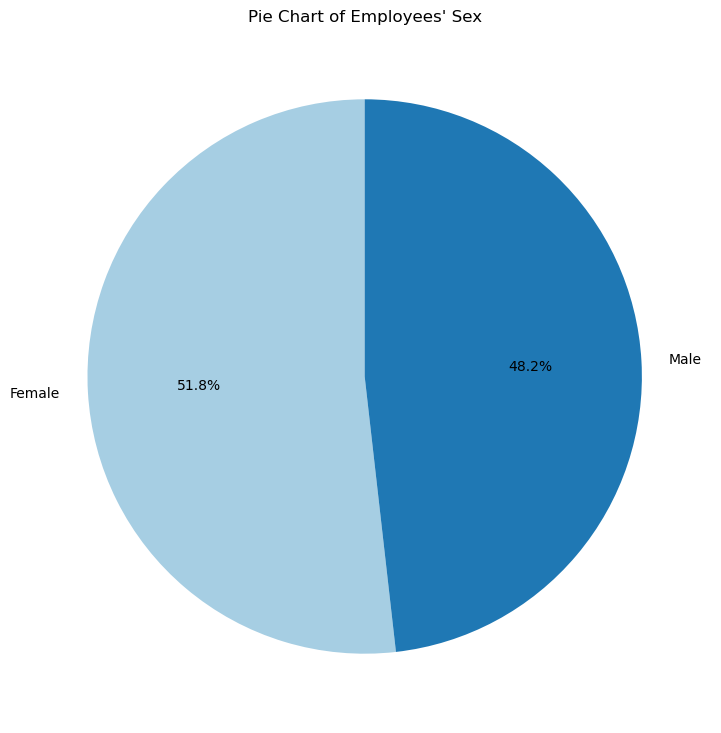

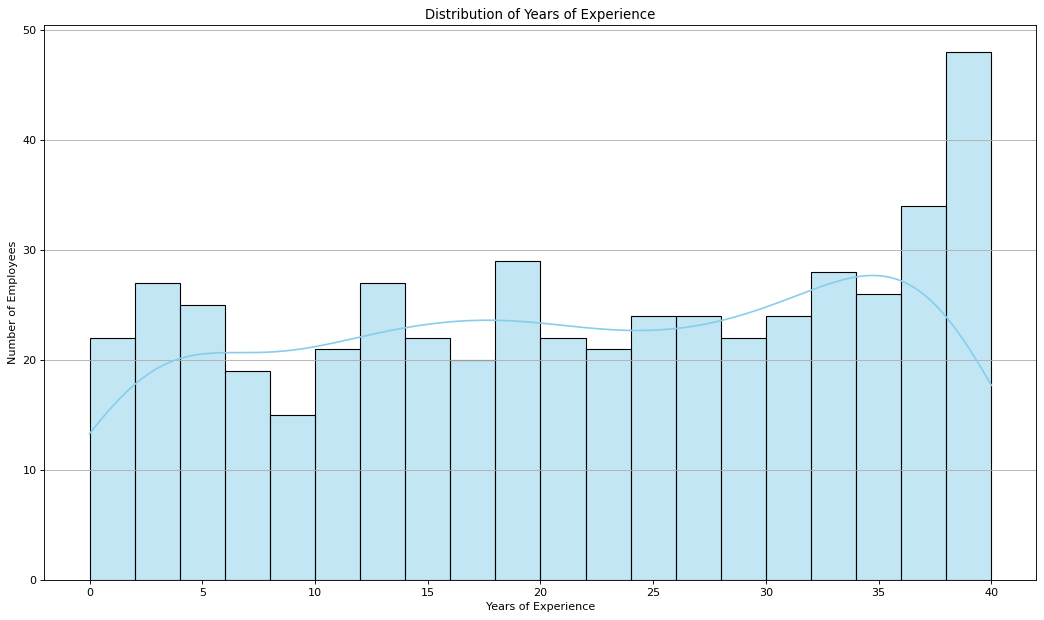

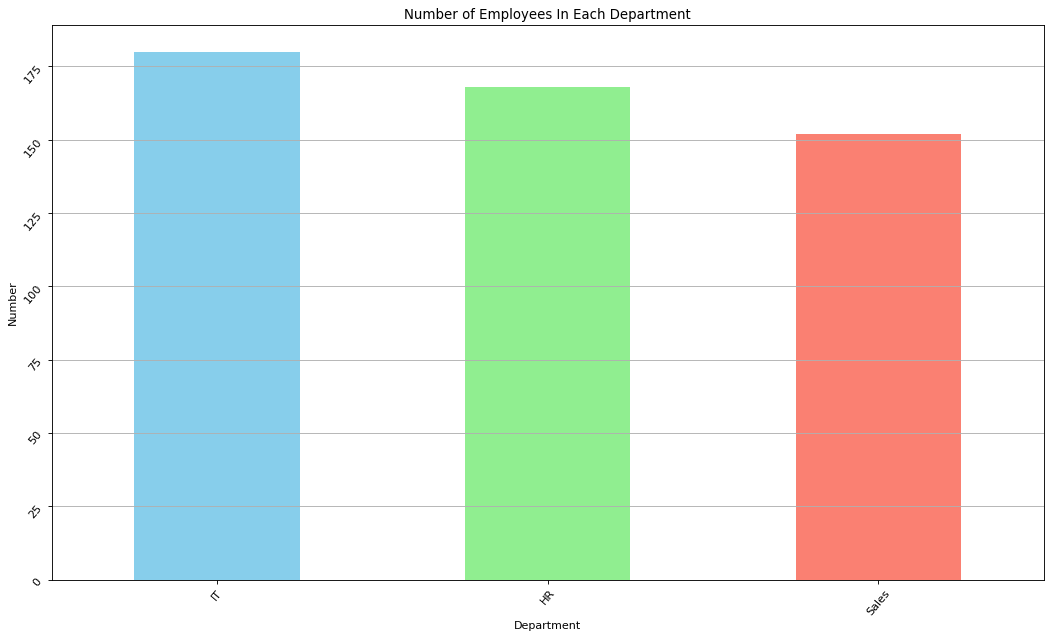

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For advanced visualization techniques

np.random.seed(96) # seed leads to generate repeatable output, which is good for testing and code sharing.

employees_num = 500
departments = ['HR', 'IT', 'Sales']
sexes = ['Male', 'Female']
max_experience = 40

employee_ids = np.arange(1, employees_num + 1) 
departments_random = np.random.choice(departments, employees_num) # generate random departments
sexes_random = np.random.choice(sexes, employees_num) # generate random sex
experience_years = np.random.randint(0, max_experience + 1, employees_num) # generate random experience years

# create a DataFrame
employee_data = pd.DataFrame({
    'Employee ID': employee_ids,
    'Department': departments_random,
    'Sex': sexes_random,
    'Years of Experience': experience_years
})


department_counts = employee_data['Department'].value_counts() # calculate the summary of employees
sex_counts = employee_data['Sex'].value_counts() # and the sex counts

# a pie chart of sex
plt.figure(figsize=(9, 9))
sex_counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(np.arange(len(sex_counts))))
# Note: 'autopct' automatically adds labels with the percentage format
plt.title("Pie Chart of Employees' Sex")  # a title
plt.ylabel("")  # Remove the y-label as it's not needed in pie charts
plt.show()


# a histogram of years of experience
plt.figure(figsize=(16, 9), dpi=80)  # set the size and resolution of the plot
sns.histplot(employee_data['Years of Experience'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Employees')
plt.grid(axis='y')
plt.show()


# a bar chart of the number of employees in each department
plt.figure(figsize=(16, 9), dpi = 80)
department_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon']) 
plt.title('Number of Employees In Each Department')
plt.xlabel('Department')
plt.ylabel('Number')
plt.xticks(rotation=50)
plt.yticks(rotation=50)
plt.grid(axis='y')
plt.show()


## 4.Attention[1] is a classic and popular technique in natural language processing. Please randomly initialize Q and K vectors and visualize the attention score via heatmap.

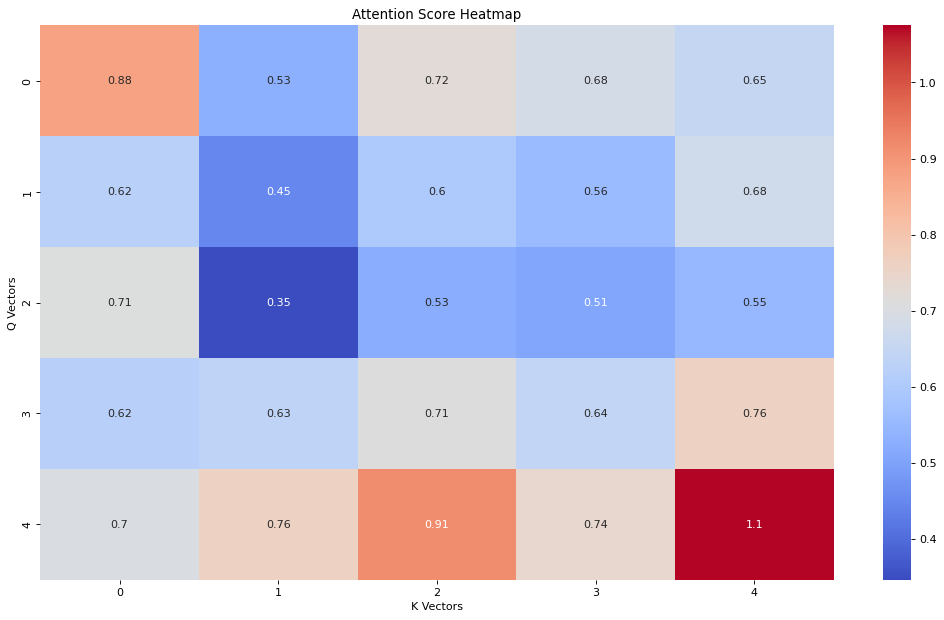

In [100]:
# generate random Q & K
np.random.seed(48)
Q = np.random.rand(5, 10)
K = np.random.rand(5, 10)

# compute attention score
dk = 10  # hidden dimension in this case
attention_scores = np.dot(Q, K.T) / np.sqrt(dk)

# a heatmap of attention scores
plt.figure(figsize=(16, 9), dpi = 80)
sns.heatmap(attention_scores, annot=True, cmap="coolwarm", cbar=True)
plt.title("Attention Score Heatmap")
plt.xlabel("K Vectors")
plt.ylabel("Q Vectors")
plt.show()